In [8]:
# ==========================================
# PROYEK AKHIR: Data Analisis Eksplorasi
# Langkah 1: Setup dan Load Data
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Path ke dataset dan output (gunakan absolute path)
data_path = 'D:\\coursera-assigment\\titanic_dataset\\'
output_path = 'D:\\coursera-assigment\\Course 1 - EDA\\result\\'

# Verifikasi folder ada
if not os.path.exists(data_path):
    print(f"⚠️ Warning: Folder '{data_path}' tidak ditemukan!")
    print(f"Working directory saat ini: {os.getcwd()}")
else:
    print(f"✓ Folder dataset ditemukan: {os.path.abspath(data_path)}")

# Verifikasi folder output
if not os.path.exists(output_path):
    os.makedirs(output_path)
    print(f"✓ Folder output dibuat: {os.path.abspath(output_path)}")
else:
    print(f"✓ Folder output ditemukan: {os.path.abspath(output_path)}")

# Load datasets
train_df = pd.read_csv(data_path + 'train.csv')
test_df = pd.read_csv(data_path + 'test.csv')
gender_submission = pd.read_csv(data_path + 'gender_submission.csv')

print("="*60)
print("DATASET BERHASIL DI-LOAD!")
print("="*60)

# Informasi dasar tentang dataset
print("\n[1] UKURAN DATASET")
print(f"Training data: {train_df.shape[0]} baris, {train_df.shape[1]} kolom")
print(f"Testing data: {test_df.shape[0]} baris, {test_df.shape[1]} kolom")

print("\n[2] PREVIEW DATA TRAINING (5 baris pertama)")
print(train_df.head())

print("\n[3] INFORMASI KOLOM")
print(train_df.info())

print("\n[4] DESKRIPSI STATISTIK")
print(train_df.describe())

print("\n[5] VARIABEL TARGET")
print(f"Target Variable: 'Survived' (0 = Tidak Selamat, 1 = Selamat)")
print(f"Distribusi Target:")
print(train_df['Survived'].value_counts())
print(f"Persentase yang Selamat: {train_df['Survived'].mean()*100:.2f}%")

✓ Folder dataset ditemukan: D:\coursera-assigment\titanic_dataset
✓ Folder output ditemukan: D:\coursera-assigment\Course 1 - EDA\result
DATASET BERHASIL DI-LOAD!

[1] UKURAN DATASET
Training data: 891 baris, 12 kolom
Testing data: 418 baris, 11 kolom

[2] PREVIEW DATA TRAINING (5 baris pertama)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Tic

In [9]:
# ==========================================
# Langkah 2: Rencana Eksplorasi Data
# ==========================================

print("="*60)
print("RENCANA EKSPLORASI DATA TITANIC")
print("="*60)

# Analisis Missing Values lebih detail
print("\n[A] ANALISIS MISSING VALUES")
print("-" * 60)
missing = train_df.isnull().sum()
missing_percent = (train_df.isnull().sum() / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Kolom': missing.index,
    'Jumlah Missing': missing.values,
    'Persentase (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Jumlah Missing'] > 0].sort_values('Jumlah Missing', ascending=False)
print(missing_df.to_string(index=False))

# Pertanyaan Eksplorasi
print("\n[B] PERTANYAAN EKSPLORASI YANG AKAN DIJAWAB")
print("-" * 60)

questions = [
    "1. Bagaimana distribusi variabel demografis (Age, Sex, Pclass)?",
    "2. Apakah ada hubungan antara jenis kelamin dan tingkat keselamatan?",
    "3. Apakah kelas tiket (Pclass) mempengaruhi tingkat keselamatan?",
    "4. Bagaimana distribusi usia penumpang yang selamat vs tidak selamat?",
    "5. Apakah harga tiket (Fare) berkorelasi dengan tingkat keselamatan?",
    "6. Apakah jumlah keluarga (SibSp + Parch) mempengaruhi keselamatan?",
    "7. Dari pelabuhan mana penumpang dengan tingkat keselamatan tertinggi?",
    "8. Apakah ada pola dalam data yang hilang (missing values)?"
]

for q in questions:
    print(q)

print("\n[C] VISUALISASI YANG AKAN DIBUAT")
print("-" * 60)
visualizations = [
    "1. Histogram distribusi Age",
    "2. Count plot untuk Sex dan Pclass",
    "3. Bar plot tingkat survival berdasarkan Sex",
    "4. Bar plot tingkat survival berdasarkan Pclass",
    "5. Box plot Age vs Survived",
    "6. Histogram Fare dengan hue Survived",
    "7. Correlation heatmap",
    "8. Count plot Family Size vs Survived"
]

for v in visualizations:
    print(v)

print("\n[D] STATISTIK DESKRIPTIF BERDASARKAN SURVIVAL")
print("-" * 60)
print("\nStatistik untuk yang SELAMAT:")
print(train_df[train_df['Survived'] == 1][['Age', 'Fare', 'SibSp', 'Parch']].describe())

print("\nStatistik untuk yang TIDAK SELAMAT:")
print(train_df[train_df['Survived'] == 0][['Age', 'Fare', 'SibSp', 'Parch']].describe())

print("\n[E] ANALISIS KATEGORIKAL")
print("-" * 60)
print("\nSurvival Rate berdasarkan SEX:")
print(train_df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean']))

print("\nSurvival Rate berdasarkan PCLASS:")
print(train_df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean']))

print("\nSurvival Rate berdasarkan EMBARKED:")
print(train_df.groupby('Embarked')['Survived'].agg(['count', 'sum', 'mean']))

RENCANA EKSPLORASI DATA TITANIC

[A] ANALISIS MISSING VALUES
------------------------------------------------------------
   Kolom  Jumlah Missing  Persentase (%)
   Cabin             687       77.104377
     Age             177       19.865320
Embarked               2        0.224467

[B] PERTANYAAN EKSPLORASI YANG AKAN DIJAWAB
------------------------------------------------------------
1. Bagaimana distribusi variabel demografis (Age, Sex, Pclass)?
2. Apakah ada hubungan antara jenis kelamin dan tingkat keselamatan?
3. Apakah kelas tiket (Pclass) mempengaruhi tingkat keselamatan?
4. Bagaimana distribusi usia penumpang yang selamat vs tidak selamat?
5. Apakah harga tiket (Fare) berkorelasi dengan tingkat keselamatan?
6. Apakah jumlah keluarga (SibSp + Parch) mempengaruhi keselamatan?
7. Dari pelabuhan mana penumpang dengan tingkat keselamatan tertinggi?
8. Apakah ada pola dalam data yang hilang (missing values)?

[C] VISUALISASI YANG AKAN DIBUAT
--------------------------------------

EXPLORATORY DATA ANALYSIS (EDA) - VISUALISASI


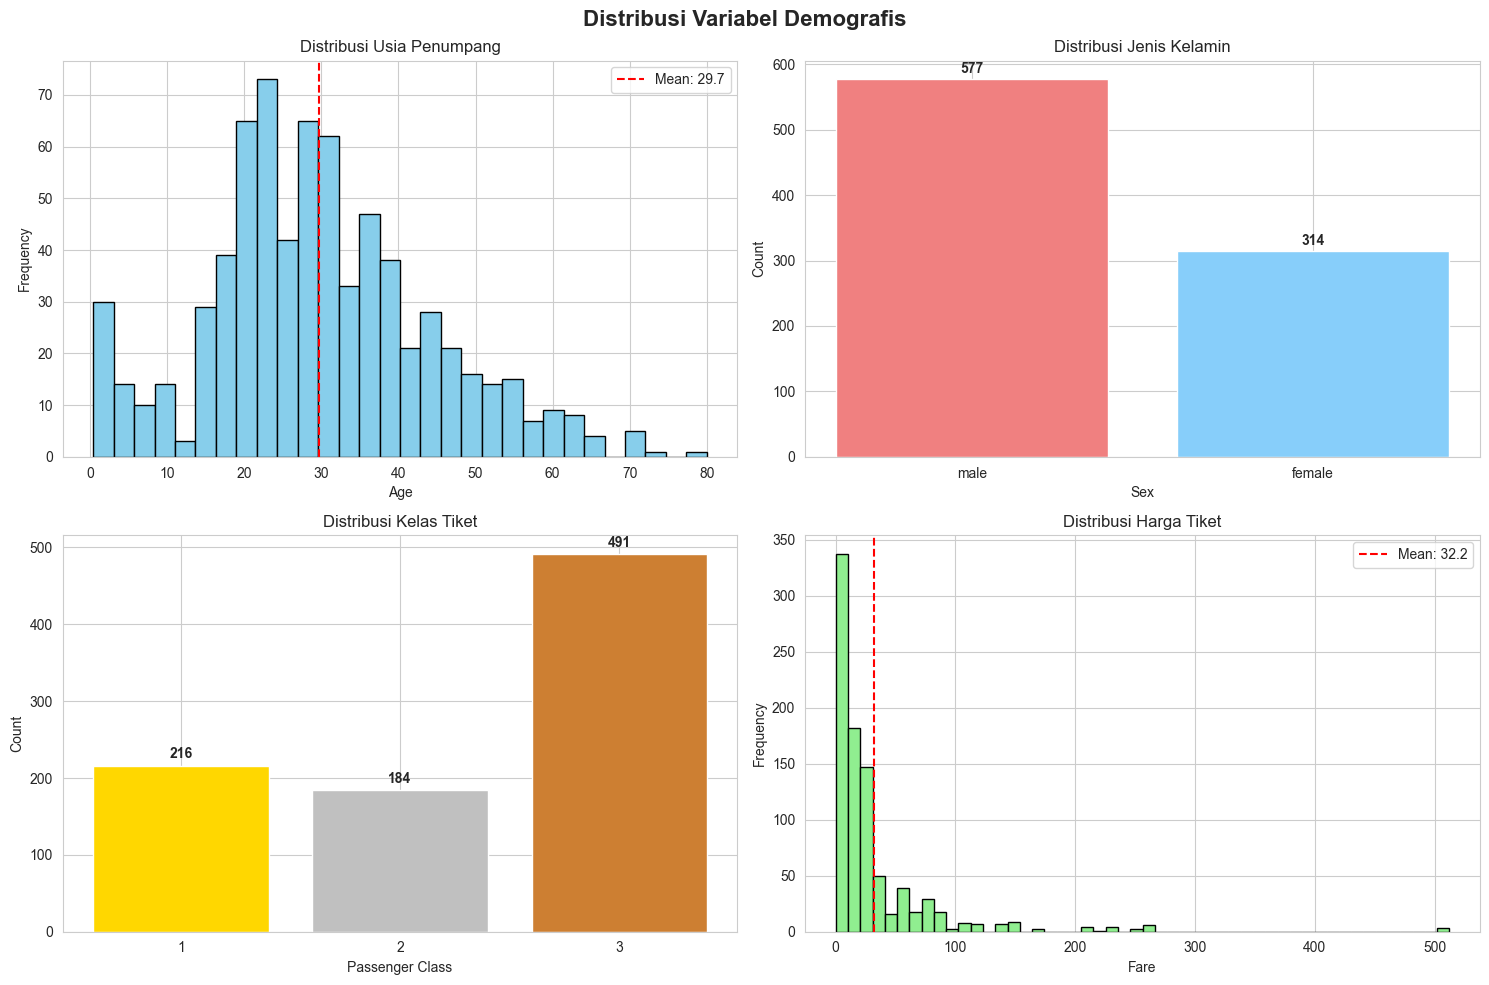


✓ Grafik 1: Distribusi Variabel Demografis - SELESAI


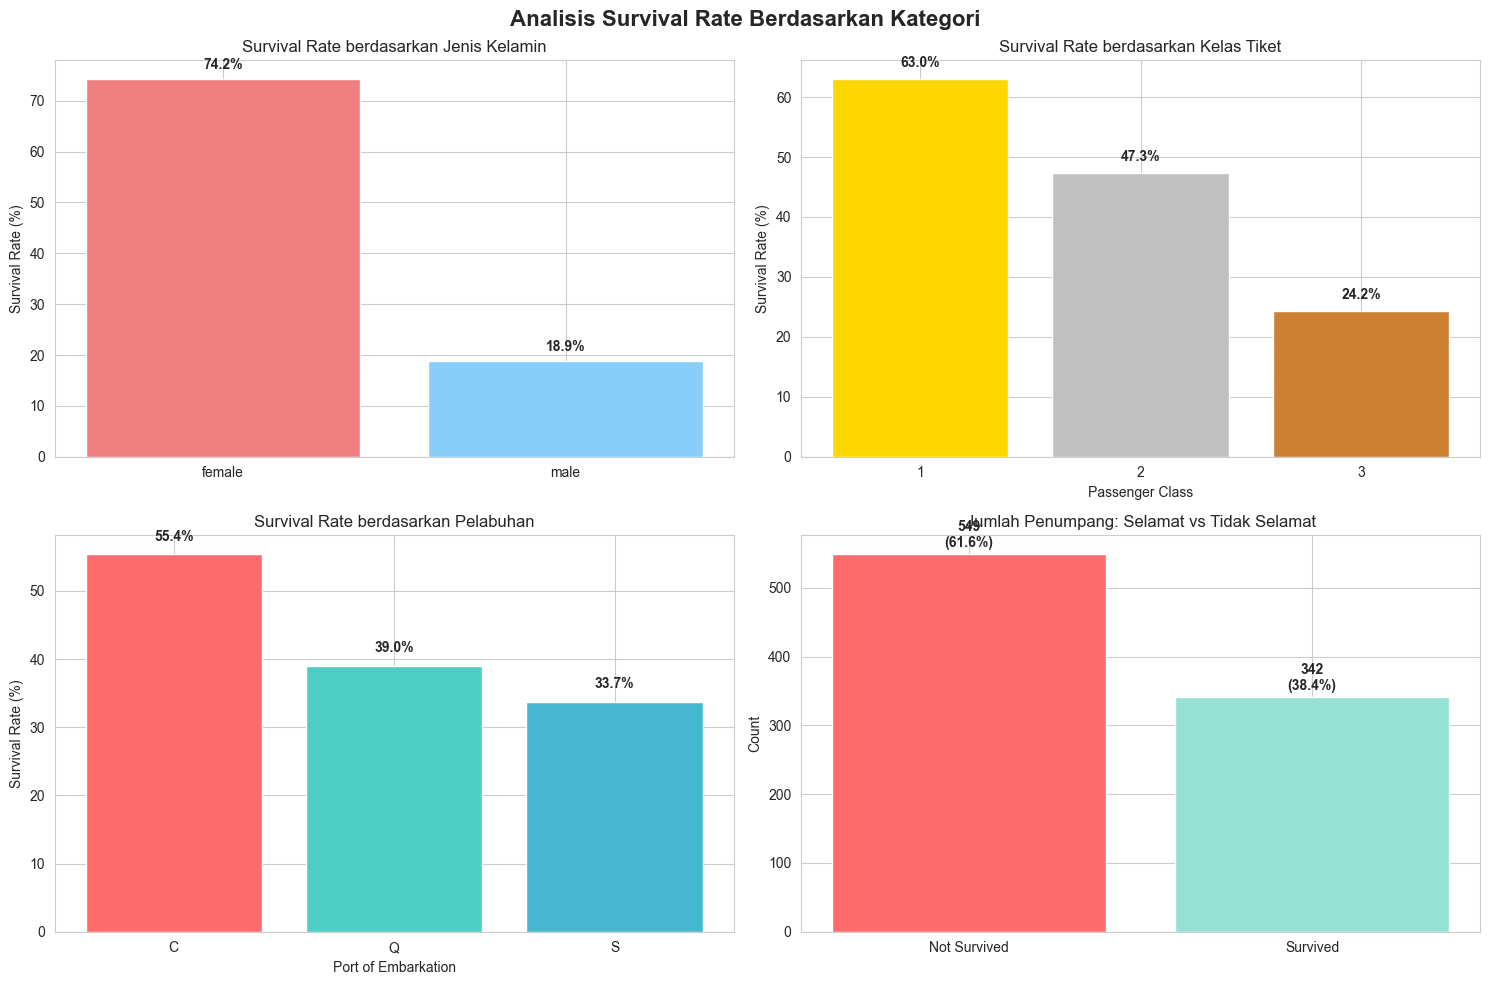

✓ Grafik 2: Survival Rate Analysis - SELESAI


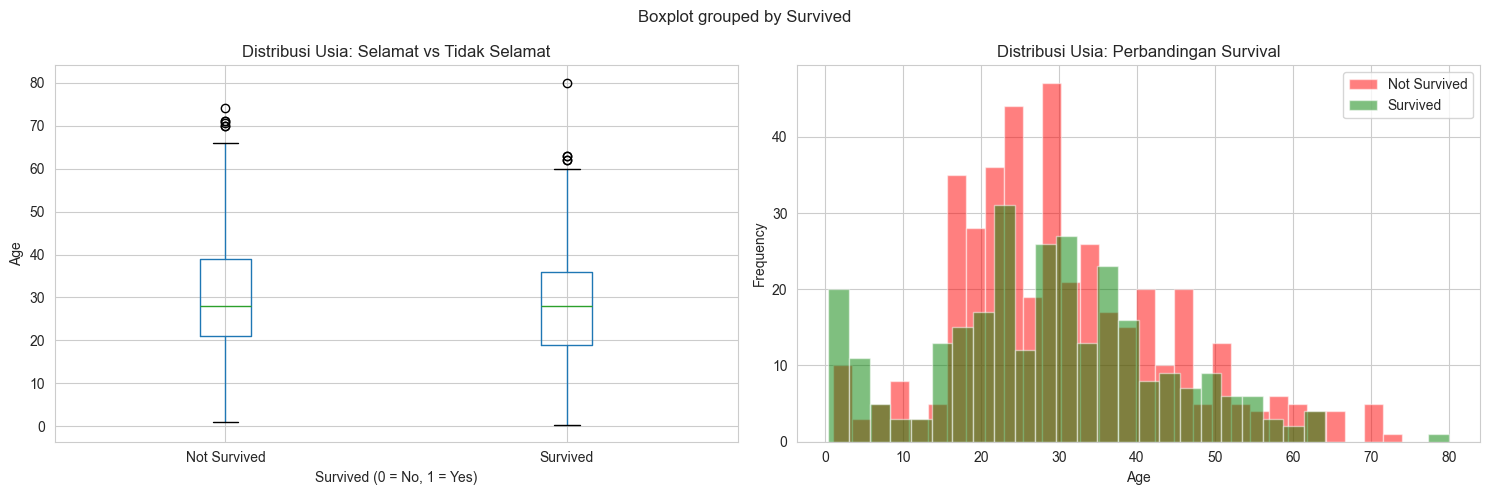

✓ Grafik 3: Age vs Survival - SELESAI


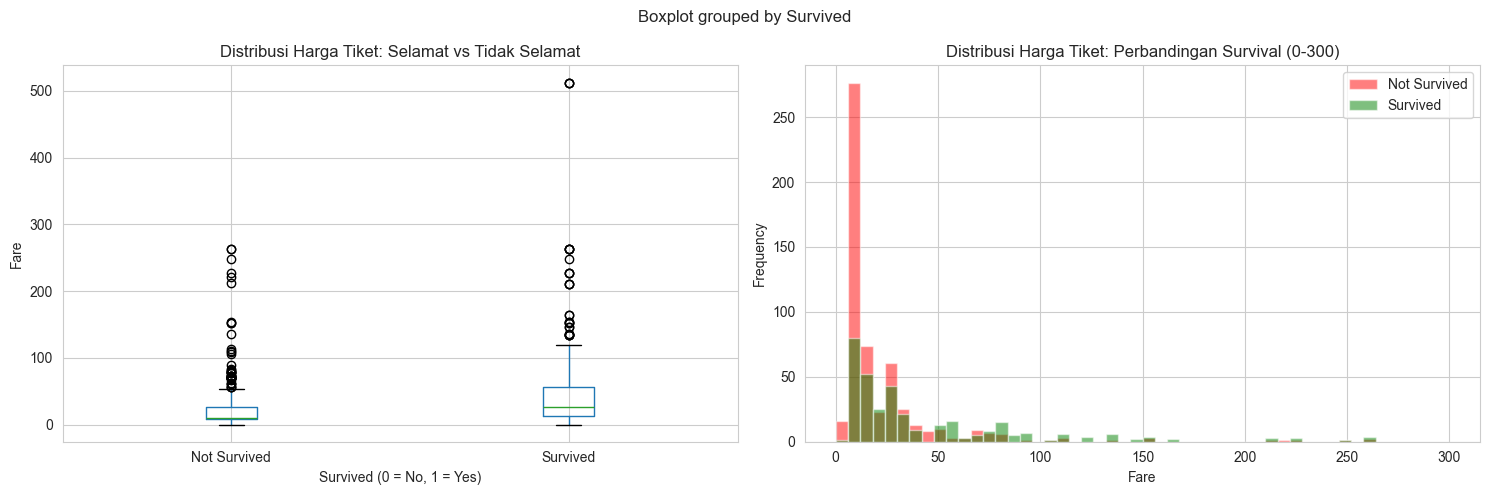

✓ Grafik 4: Fare vs Survival - SELESAI


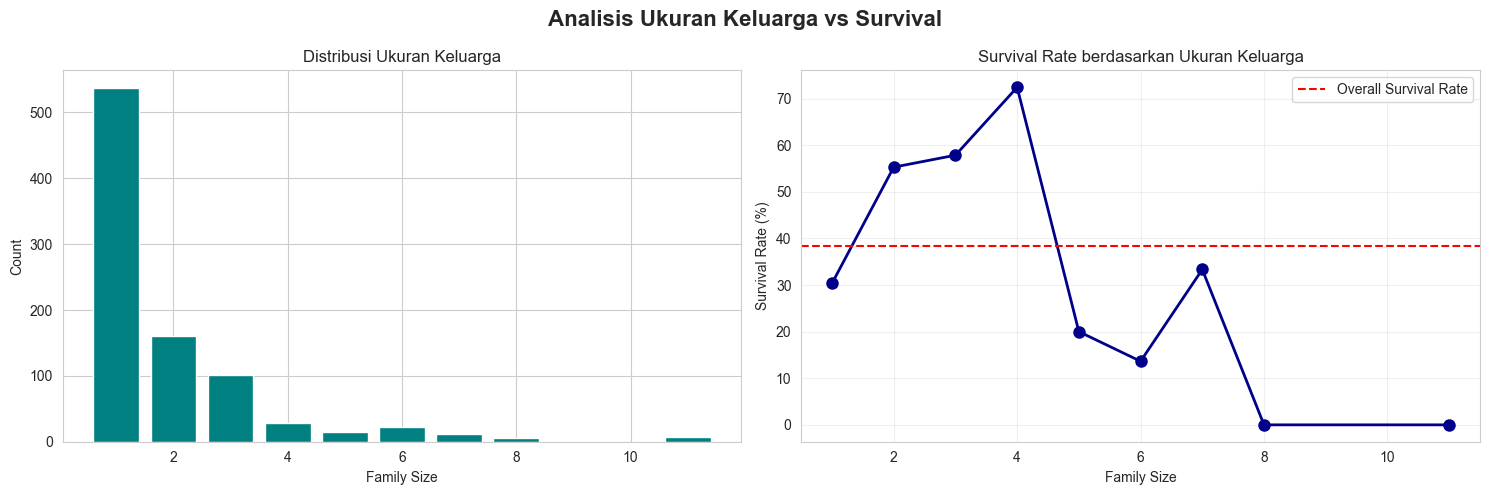

✓ Grafik 5: Family Size vs Survival - SELESAI


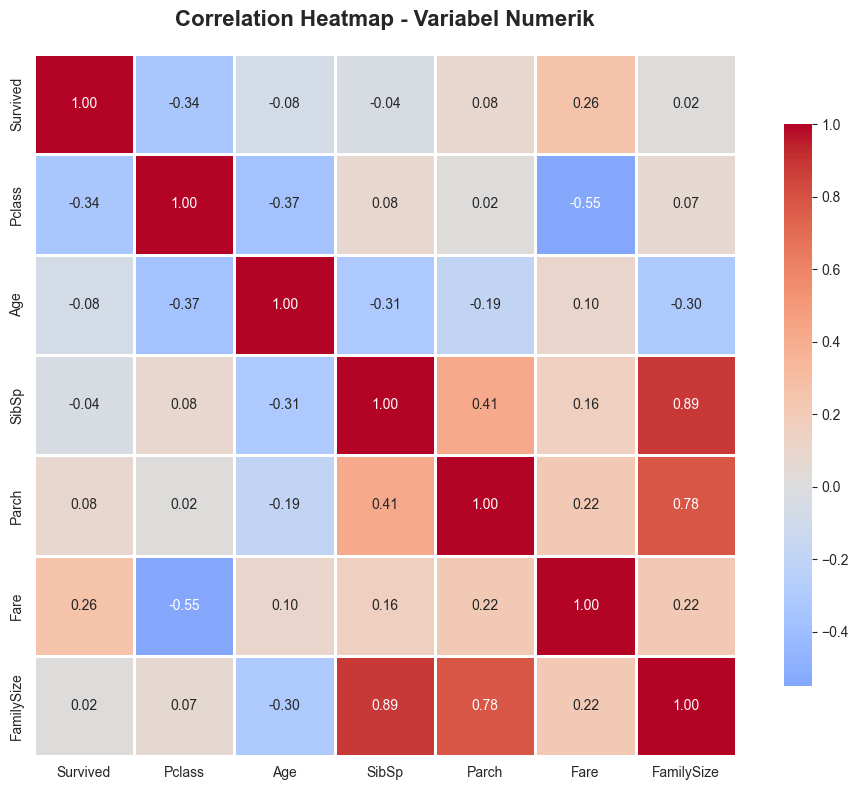

✓ Grafik 6: Correlation Heatmap - SELESAI


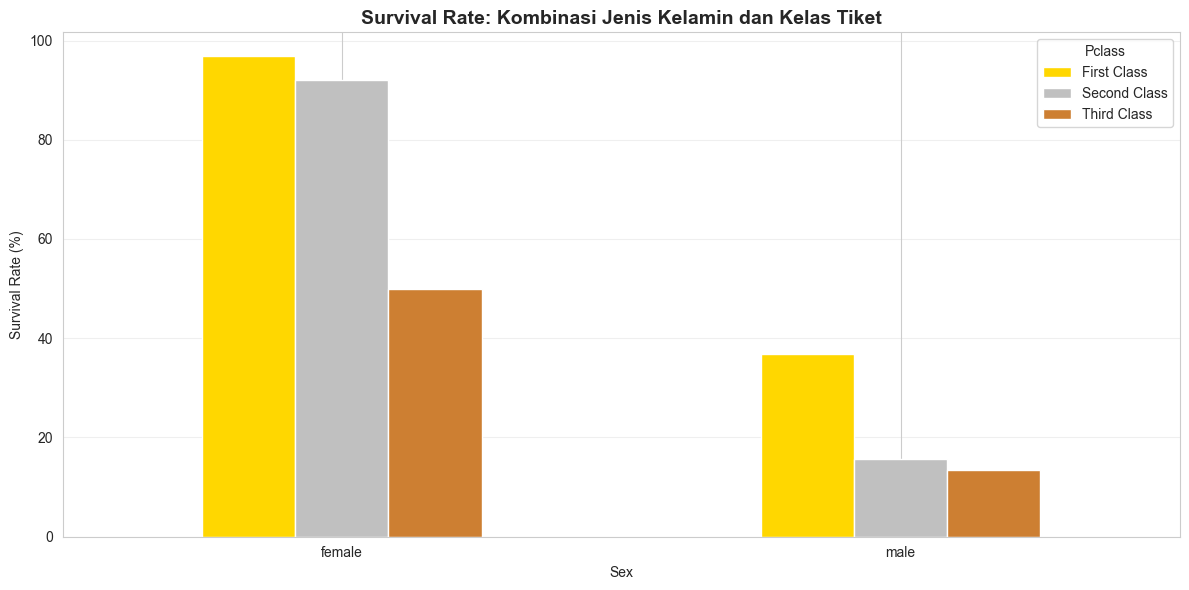

✓ Grafik 7: Sex & Pclass Combination - SELESAI

SEMUA VISUALISASI BERHASIL DIBUAT!
File disimpan di: D:\coursera-assigment\Course 1 - EDA\result\


In [10]:
# ==========================================
# Langkah 3: ANALISIS DATA EKSPLORATIF (EDA)
# ==========================================

print("="*60)
print("EXPLORATORY DATA ANALYSIS (EDA) - VISUALISASI")
print("="*60)

# ==========================================
# 1. DISTRIBUSI VARIABEL DEMOGRAFIS
# ==========================================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribusi Variabel Demografis', fontsize=16, fontweight='bold')

# Age Distribution
axes[0, 0].hist(train_df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribusi Usia Penumpang')
axes[0, 0].axvline(train_df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["Age"].mean():.1f}')
axes[0, 0].legend()

# Sex Distribution
sex_counts = train_df['Sex'].value_counts()
axes[0, 1].bar(sex_counts.index, sex_counts.values, color=['lightcoral', 'lightskyblue'])
axes[0, 1].set_xlabel('Sex')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribusi Jenis Kelamin')
for i, v in enumerate(sex_counts.values):
    axes[0, 1].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pclass Distribution
pclass_counts = train_df['Pclass'].value_counts().sort_index()
axes[1, 0].bar(pclass_counts.index, pclass_counts.values, color=['gold', 'silver', '#CD7F32'])
axes[1, 0].set_xlabel('Passenger Class')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribusi Kelas Tiket')
axes[1, 0].set_xticks([1, 2, 3])
for i, v in enumerate(pclass_counts.values):
    axes[1, 0].text(i+1, v + 10, str(v), ha='center', fontweight='bold')

# Fare Distribution
axes[1, 1].hist(train_df['Fare'], bins=50, color='lightgreen', edgecolor='black')
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribusi Harga Tiket')
axes[1, 1].axvline(train_df['Fare'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["Fare"].mean():.1f}')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig(output_path + 'visualisasi_demografis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Grafik 1: Distribusi Variabel Demografis - SELESAI")

# ==========================================
# 2. SURVIVAL RATE BERDASARKAN KATEGORI
# ==========================================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analisis Survival Rate Berdasarkan Kategori', fontsize=16, fontweight='bold')

# Survival by Sex
survival_sex = train_df.groupby('Sex')['Survived'].mean() * 100
axes[0, 0].bar(survival_sex.index, survival_sex.values, color=['lightcoral', 'lightskyblue'])
axes[0, 0].set_ylabel('Survival Rate (%)')
axes[0, 0].set_title('Survival Rate berdasarkan Jenis Kelamin')
for i, v in enumerate(survival_sex.values):
    axes[0, 0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# Survival by Pclass
survival_pclass = train_df.groupby('Pclass')['Survived'].mean() * 100
axes[0, 1].bar(survival_pclass.index, survival_pclass.values, color=['gold', 'silver', '#CD7F32'])
axes[0, 1].set_xlabel('Passenger Class')
axes[0, 1].set_ylabel('Survival Rate (%)')
axes[0, 1].set_title('Survival Rate berdasarkan Kelas Tiket')
axes[0, 1].set_xticks([1, 2, 3])
for i, v in enumerate(survival_pclass.values, 1):
    axes[0, 1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# Survival by Embarked
survival_embarked = train_df.groupby('Embarked')['Survived'].mean() * 100
axes[1, 0].bar(survival_embarked.index, survival_embarked.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1, 0].set_xlabel('Port of Embarkation')
axes[1, 0].set_ylabel('Survival Rate (%)')
axes[1, 0].set_title('Survival Rate berdasarkan Pelabuhan')
for i, v in enumerate(survival_embarked.values):
    axes[1, 0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# Survival Count
survival_counts = train_df['Survived'].value_counts()
axes[1, 1].bar(['Not Survived', 'Survived'], survival_counts.values, color=['#FF6B6B', '#95E1D3'])
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Jumlah Penumpang: Selamat vs Tidak Selamat')
for i, v in enumerate(survival_counts.values):
    axes[1, 1].text(i, v + 10, f'{v}\n({v/len(train_df)*100:.1f}%)', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig(output_path + 'survival_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Grafik 2: Survival Rate Analysis - SELESAI")

# ==========================================
# 3. AGE vs SURVIVAL
# ==========================================

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Analisis Usia vs Survival', fontsize=16, fontweight='bold')

# Box Plot
train_df.boxplot(column='Age', by='Survived', ax=axes[0])
axes[0].set_title('Distribusi Usia: Selamat vs Tidak Selamat')
axes[0].set_xlabel('Survived (0 = No, 1 = Yes)')
axes[0].set_ylabel('Age')
plt.sca(axes[0])
plt.xticks([1, 2], ['Not Survived', 'Survived'])

# Histogram dengan overlay
axes[1].hist(train_df[train_df['Survived']==0]['Age'].dropna(), bins=30, alpha=0.5, label='Not Survived', color='red')
axes[1].hist(train_df[train_df['Survived']==1]['Age'].dropna(), bins=30, alpha=0.5, label='Survived', color='green')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribusi Usia: Perbandingan Survival')
axes[1].legend()

plt.tight_layout()
plt.savefig(output_path + 'age_survival.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Grafik 3: Age vs Survival - SELESAI")

# ==========================================
# 4. FARE vs SURVIVAL
# ==========================================

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Analisis Harga Tiket vs Survival', fontsize=16, fontweight='bold')

# Box Plot
train_df.boxplot(column='Fare', by='Survived', ax=axes[0])
axes[0].set_title('Distribusi Harga Tiket: Selamat vs Tidak Selamat')
axes[0].set_xlabel('Survived (0 = No, 1 = Yes)')
axes[0].set_ylabel('Fare')
plt.sca(axes[0])
plt.xticks([1, 2], ['Not Survived', 'Survived'])

# Histogram dengan overlay (batasi x-axis untuk clarity)
axes[1].hist(train_df[train_df['Survived']==0]['Fare'], bins=50, alpha=0.5, label='Not Survived', color='red', range=(0, 300))
axes[1].hist(train_df[train_df['Survived']==1]['Fare'], bins=50, alpha=0.5, label='Survived', color='green', range=(0, 300))
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribusi Harga Tiket: Perbandingan Survival (0-300)')
axes[1].legend()

plt.tight_layout()
plt.savefig(output_path + 'fare_survival.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Grafik 4: Fare vs Survival - SELESAI")

# ==========================================
# 5. FAMILY SIZE ANALYSIS
# ==========================================

# Buat variabel baru: Family Size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Analisis Ukuran Keluarga vs Survival', fontsize=16, fontweight='bold')

# Distribution
family_counts = train_df['FamilySize'].value_counts().sort_index()
axes[0].bar(family_counts.index, family_counts.values, color='teal')
axes[0].set_xlabel('Family Size')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribusi Ukuran Keluarga')

# Survival Rate by Family Size
survival_family = train_df.groupby('FamilySize')['Survived'].mean() * 100
axes[1].plot(survival_family.index, survival_family.values, marker='o', linewidth=2, markersize=8, color='darkblue')
axes[1].set_xlabel('Family Size')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_title('Survival Rate berdasarkan Ukuran Keluarga')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=38.38, color='r', linestyle='--', label='Overall Survival Rate')
axes[1].legend()

plt.tight_layout()
plt.savefig(output_path + 'family_survival.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Grafik 5: Family Size vs Survival - SELESAI")

# ==========================================
# 6. CORRELATION HEATMAP
# ==========================================

# Buat dataframe numerik untuk korelasi
numeric_df = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']].copy()

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Variabel Numerik', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(output_path + 'correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Grafik 6: Correlation Heatmap - SELESAI")

# ==========================================
# 7. KOMBINASI SEX DAN PCLASS
# ==========================================

plt.figure(figsize=(12, 6))

# Group by Sex and Pclass
survival_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
survival_sex_pclass = survival_sex_pclass.unstack()

survival_sex_pclass.plot(kind='bar', ax=plt.gca(), color=['gold', 'silver', '#CD7F32'])
plt.title('Survival Rate: Kombinasi Jenis Kelamin dan Kelas Tiket', fontsize=14, fontweight='bold')
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.legend(title='Pclass', labels=['First Class', 'Second Class', 'Third Class'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(output_path + 'sex_pclass_survival.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Grafik 7: Sex & Pclass Combination - SELESAI")

print("\n" + "="*60)
print("SEMUA VISUALISASI BERHASIL DIBUAT!")
print("File disimpan di:", output_path)
print("="*60)

DATA CLEANING & FEATURE ENGINEERING

[A] HANDLING MISSING VALUES
------------------------------------------------------------

1. Handling Missing EMBARKED:
   Missing values: 2
   ✓ Diisi dengan modus: 'S'

2. Handling Missing FARE:
   Test set missing: 1
   ✓ Diisi dengan median: $14.45

3. Handling Missing AGE:
   Train missing: 177
   Test missing: 86
   Strategi: Isi dengan median berdasarkan Pclass & Sex
   ✓ Age diisi berdasarkan Pclass & Sex

4. Handling CABIN:
   Missing: 687 (77.1%)
   ✓ Membuat fitur baru: HasCabin (0 = No cabin info, 1 = Has cabin)

✓ MISSING VALUES SETELAH CLEANING:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
HasCabin         0
dtype: int64

[B] FEATURE ENGINEERING
------------------------------------------------------------

1. Creating FAMILYSIZE:
   ✓ Fa

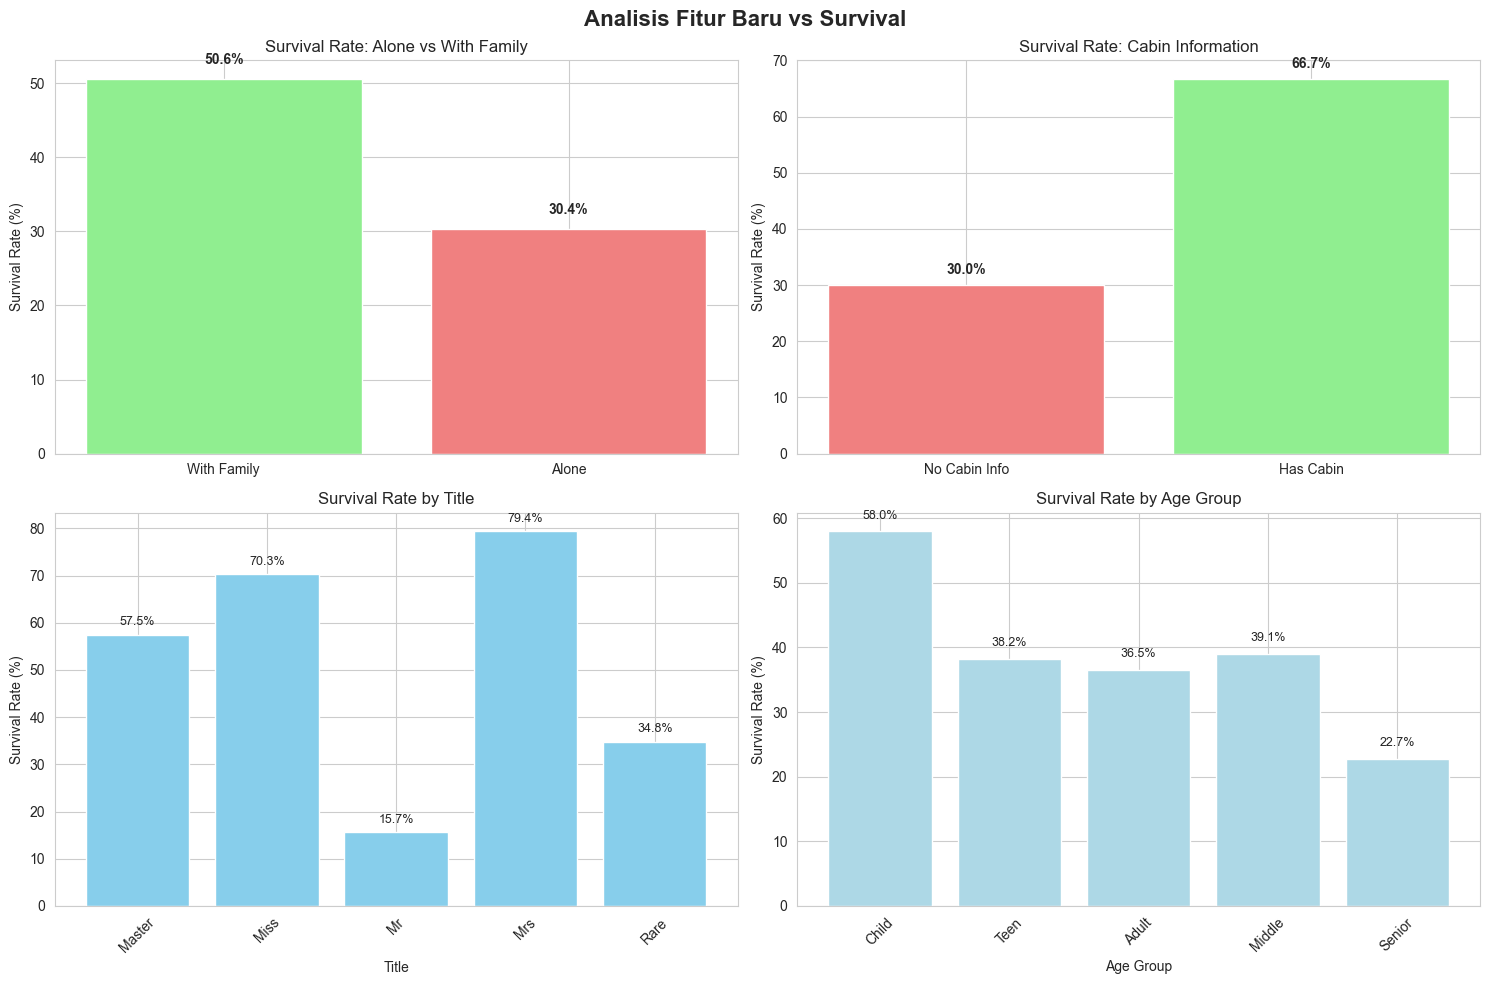


✓ Grafik fitur baru telah disimpan!

DATA CLEANING & FEATURE ENGINEERING SELESAI!

✓ File tersimpan di: D:\coursera-assigment\Course 1 - EDA\result\
  - train_cleaned.csv
  - test_cleaned.csv
  - new_features_survival.png


In [11]:
# ==========================================
# Langkah 4: PEMBERSIHAN DATA & REKAYASA FITUR
# ==========================================

from sklearn.preprocessing import LabelEncoder

print("="*60)
print("DATA CLEANING & FEATURE ENGINEERING")
print("="*60)

# Copy dataframe untuk preprocessing
train_clean = train_df.copy()
test_clean = test_df.copy()

# Gabungkan untuk konsistensi preprocessing
full_data = [train_clean, test_clean]

print("\n[A] HANDLING MISSING VALUES")
print("-" * 60)

# 1. EMBARKED - Hanya 2 missing, isi dengan modus
print("\n1. Handling Missing EMBARKED:")
print(f"   Missing values: {train_clean['Embarked'].isnull().sum()}")
most_common_embarked = train_clean['Embarked'].mode()[0]
for dataset in full_data:
    dataset['Embarked'].fillna(most_common_embarked, inplace=True)
print(f"   ✓ Diisi dengan modus: '{most_common_embarked}'")

# 2. FARE - 1 missing di test set
print("\n2. Handling Missing FARE:")
print(f"   Test set missing: {test_clean['Fare'].isnull().sum()}")
median_fare = train_clean['Fare'].median()
for dataset in full_data:
    dataset['Fare'].fillna(median_fare, inplace=True)
print(f"   ✓ Diisi dengan median: ${median_fare:.2f}")

# 3. AGE - Banyak missing, gunakan median berdasarkan Pclass dan Sex
print("\n3. Handling Missing AGE:")
print(f"   Train missing: {train_clean['Age'].isnull().sum()}")
print(f"   Test missing: {test_clean['Age'].isnull().sum()}")
print("   Strategi: Isi dengan median berdasarkan Pclass & Sex")

for dataset in full_data:
    for pclass in [1, 2, 3]:
        for sex in ['male', 'female']:
            median_age = train_clean[(train_clean['Pclass'] == pclass) &
                                    (train_clean['Sex'] == sex)]['Age'].median()
            dataset.loc[(dataset['Age'].isnull()) &
                       (dataset['Pclass'] == pclass) &
                       (dataset['Sex'] == sex), 'Age'] = median_age

print("   ✓ Age diisi berdasarkan Pclass & Sex")

# 4. CABIN - Terlalu banyak missing (77%), buat fitur baru: HasCabin
print("\n4. Handling CABIN:")
print(f"   Missing: {train_clean['Cabin'].isnull().sum()} ({train_clean['Cabin'].isnull().sum()/len(train_clean)*100:.1f}%)")
for dataset in full_data:
    dataset['HasCabin'] = dataset['Cabin'].notna().astype(int)
print("   ✓ Membuat fitur baru: HasCabin (0 = No cabin info, 1 = Has cabin)")

# Verifikasi
print("\n✓ MISSING VALUES SETELAH CLEANING:")
print(train_clean.isnull().sum())

print("\n" + "="*60)
print("[B] FEATURE ENGINEERING")
print("-" * 60)

# 1. FamilySize
print("\n1. Creating FAMILYSIZE:")
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print(f"   ✓ FamilySize = SibSp + Parch + 1")
print(f"   Range: {train_clean['FamilySize'].min()} - {train_clean['FamilySize'].max()}")

# 2. IsAlone
print("\n2. Creating ISALONE:")
for dataset in full_data:
    dataset['IsAlone'] = (dataset['FamilySize'] == 1).astype(int)
print(f"   ✓ IsAlone: 1 jika sendirian, 0 jika dengan keluarga")
print(f"   Alone: {train_clean['IsAlone'].sum()} orang ({train_clean['IsAlone'].sum()/len(train_clean)*100:.1f}%)")

# 3. Title extraction dari Name
print("\n3. Extracting TITLE from Name:")
for dataset in full_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print("   Distribusi Title:")
print(train_clean['Title'].value_counts())

# Simplify titles
print("\n   Menyederhanakan Title:")
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print("   ✓ Title disederhanakan menjadi: Mr, Miss, Mrs, Master, Rare")
print(train_clean['Title'].value_counts())

# 4. Age Groups
print("\n4. Creating AGE GROUPS:")
for dataset in full_data:
    dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[0, 12, 20, 40, 60, 100],
                                  labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
print("   ✓ Age Groups: Child (0-12), Teen (12-20), Adult (20-40), Middle (40-60), Senior (60+)")
print(train_clean['AgeGroup'].value_counts())

# 5. Fare Groups
print("\n5. Creating FARE GROUPS:")
for dataset in full_data:
    dataset['FareGroup'] = pd.cut(dataset['Fare'], bins=[-1, 7.91, 14.454, 31, 1000],
                                   labels=['Low', 'Medium', 'High', 'VeryHigh'])
print("   ✓ Fare Groups berdasarkan quartiles")
print(train_clean['FareGroup'].value_counts())

print("\n" + "="*60)
print("[C] ENCODING CATEGORICAL VARIABLES")
print("-" * 60)

# Label Encoding untuk variabel ordinal dan binary
print("\n1. Label Encoding untuk variabel binary/ordinal:")
label_cols = ['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareGroup']

for col in label_cols:
    le = LabelEncoder()
    le.fit(train_clean[col])
    for dataset in full_data:
        dataset[col + '_Encoded'] = le.transform(dataset[col])
    print(f"   ✓ {col} encoded")

print("\n" + "="*60)
print("[D] FEATURE SELECTION")
print("-" * 60)

# Drop kolom yang tidak diperlukan
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
print(f"\nMenghapus kolom: {drop_cols}")

# Pilih fitur final untuk modeling
feature_cols = ['Pclass', 'Sex_Encoded', 'Age', 'SibSp', 'Parch', 'Fare',
                'Embarked_Encoded', 'FamilySize', 'IsAlone', 'HasCabin',
                'Title_Encoded', 'AgeGroup_Encoded', 'FareGroup_Encoded']

X_train = train_clean[feature_cols]
y_train = train_clean['Survived']
X_test = test_clean[feature_cols]

print("\n✓ FITUR FINAL YANG DIGUNAKAN:")
for i, col in enumerate(feature_cols, 1):
    print(f"   {i}. {col}")

print(f"\n✓ Shape X_train: {X_train.shape}")
print(f"✓ Shape y_train: {y_train.shape}")
print(f"✓ Shape X_test: {X_test.shape}")

# Simpan data yang sudah dibersihkan
train_clean.to_csv(output_path + 'train_cleaned.csv', index=False)
test_clean.to_csv(output_path + 'test_cleaned.csv', index=False)

print("\n" + "="*60)
print("[E] SUMMARY STATISTIK SETELAH CLEANING")
print("-" * 60)

print("\nDataset Train setelah cleaning:")
print(train_clean.head())

print("\n✓ Info Dataset:")
print(train_clean.info())

print("\n✓ Statistik Deskriptif Fitur Baru:")
print(train_clean[['FamilySize', 'IsAlone', 'HasCabin']].describe())

# Visualisasi fitur baru vs Survival
print("\n" + "="*60)
print("[F] VISUALISASI FITUR BARU")
print("-" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analisis Fitur Baru vs Survival', fontsize=16, fontweight='bold')

# IsAlone
survival_alone = train_clean.groupby('IsAlone')['Survived'].mean() * 100
axes[0, 0].bar(['With Family', 'Alone'], survival_alone.values, color=['lightgreen', 'lightcoral'])
axes[0, 0].set_ylabel('Survival Rate (%)')
axes[0, 0].set_title('Survival Rate: Alone vs With Family')
for i, v in enumerate(survival_alone.values):
    axes[0, 0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# HasCabin
survival_cabin = train_clean.groupby('HasCabin')['Survived'].mean() * 100
axes[0, 1].bar(['No Cabin Info', 'Has Cabin'], survival_cabin.values, color=['lightcoral', 'lightgreen'])
axes[0, 1].set_ylabel('Survival Rate (%)')
axes[0, 1].set_title('Survival Rate: Cabin Information')
for i, v in enumerate(survival_cabin.values):
    axes[0, 1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# Title
survival_title = train_clean.groupby('Title')['Survived'].mean() * 100
axes[1, 0].bar(survival_title.index, survival_title.values, color='skyblue')
axes[1, 0].set_xlabel('Title')
axes[1, 0].set_ylabel('Survival Rate (%)')
axes[1, 0].set_title('Survival Rate by Title')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(survival_title.values):
    axes[1, 0].text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=9)

# AgeGroup
survival_agegroup = train_clean.groupby('AgeGroup')['Survived'].mean() * 100
axes[1, 1].bar(survival_agegroup.index, survival_agegroup.values, color='lightblue')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Survival Rate (%)')
axes[1, 1].set_title('Survival Rate by Age Group')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(survival_agegroup.values):
    axes[1, 1].text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig(output_path + 'new_features_survival.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Grafik fitur baru telah disimpan!")

print("\n" + "="*60)
print("DATA CLEANING & FEATURE ENGINEERING SELESAI!")
print("="*60)
print("\n✓ File tersimpan di:", output_path)
print("  - train_cleaned.csv")
print("  - test_cleaned.csv")
print("  - new_features_survival.png")

PENGUJIAN HIPOTESIS & ANALISIS SIGNIFIKANSI

HIPOTESIS 1: JENIS KELAMIN vs SURVIVAL

H₀: Tidak ada perbedaan signifikan survival antara male dan female
H₁: Perempuan memiliki survival rate lebih tinggi dari laki-laki
Significance Level (α): 0.05

Contingency Table (Sex vs Survived):
Survived    0    1
Sex               
female     81  233
male      468  109

[Hasil Uji Chi-Square]
Chi-square statistic: 260.7170
P-value: 0.000000
Degrees of freedom: 1

✓ KESIMPULAN: P-value (0.000000) < α (0.05)
  Tolak H₀. Ada perbedaan signifikan dalam survival berdasarkan jenis kelamin.
  Perempuan memiliki peluang survival yang signifikan lebih tinggi.

Effect Size (Cramér's V): 0.5409
Effect size: Besar (sangat kuat)

HIPOTESIS 2: KELAS TIKET vs SURVIVAL

H₀: Tidak ada perbedaan signifikan survival di antara ketiga kelas
H₁: Ada perbedaan signifikan survival berdasarkan kelas tiket
Significance Level (α): 0.05

Contingency Table (Pclass vs Survived):
Survived    0    1
Pclass            
1         

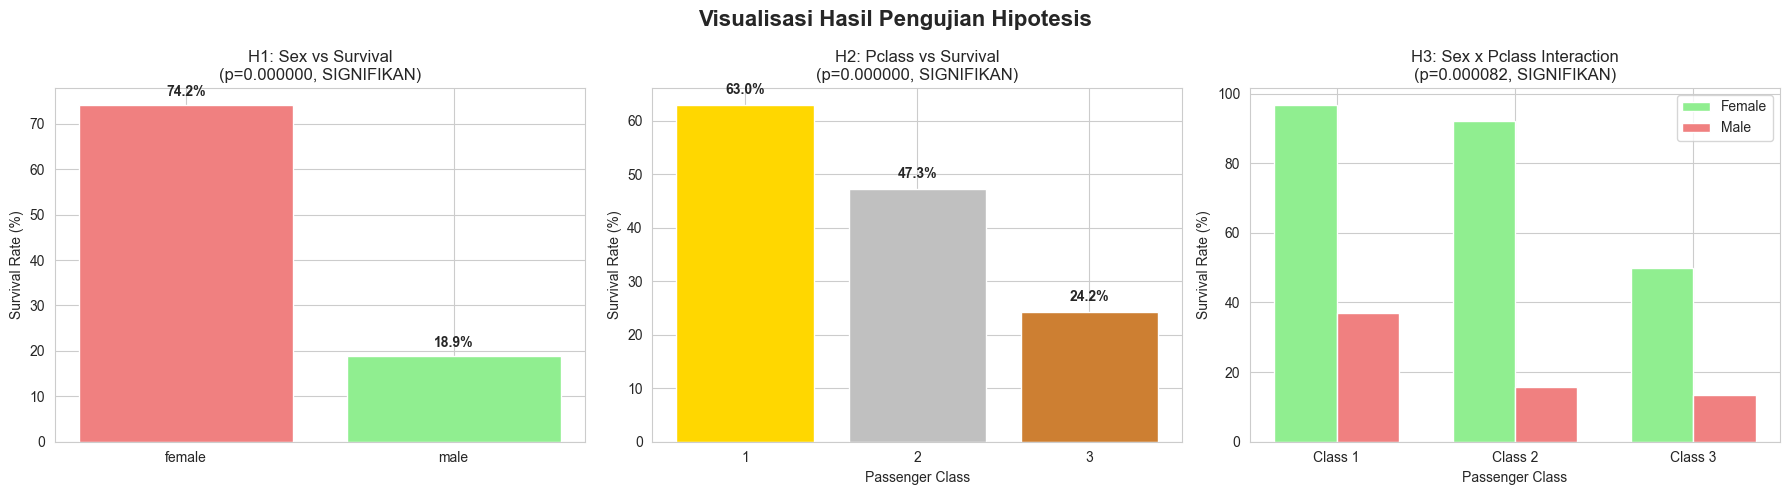


✓ Visualisasi hasil pengujian hipotesis tersimpan!

RINGKASAN HASIL PENGUJIAN HIPOTESIS


                   Hipotesis Chi-square / LR  P-value Keputusan Signifikansi
         H1: Sex vs Survival        260.7170 0.000000  Tolak H₀           Ya
      H2: Pclass vs Survival        102.8890 0.000000  Tolak H₀           Ya
H3: Sex x Pclass Interaction         15.5018 0.000082  Tolak H₀           Ya

✓ Summary hasil pengujian hipotesis tersimpan di: hypothesis_testing_summary.csv

PENGUJIAN HIPOTESIS SELESAI!


In [12]:
# ==========================================
# Langkah 7: PENGUJIAN HIPOTESIS
# ==========================================

from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss

print("="*60)
print("PENGUJIAN HIPOTESIS & ANALISIS SIGNIFIKANSI")
print("="*60)

# Significance level
alpha = 0.05

# ==========================================
# HIPOTESIS 1: Jenis Kelamin vs Survival
# ==========================================

print("\n" + "="*60)
print("HIPOTESIS 1: JENIS KELAMIN vs SURVIVAL")
print("="*60)

print("\nH₀: Tidak ada perbedaan signifikan survival antara male dan female")
print("H₁: Perempuan memiliki survival rate lebih tinggi dari laki-laki")
print(f"Significance Level (α): {alpha}")

# Contingency table
contingency_sex = pd.crosstab(train_df['Sex'], train_df['Survived'])
print("\nContingency Table (Sex vs Survived):")
print(contingency_sex)

# Chi-square test
chi2_sex, p_sex, dof_sex, expected_sex = chi2_contingency(contingency_sex)

print(f"\n[Hasil Uji Chi-Square]")
print(f"Chi-square statistic: {chi2_sex:.4f}")
print(f"P-value: {p_sex:.6f}")
print(f"Degrees of freedom: {dof_sex}")

if p_sex < alpha:
    print(f"\n✓ KESIMPULAN: P-value ({p_sex:.6f}) < α ({alpha})")
    print("  Tolak H₀. Ada perbedaan signifikan dalam survival berdasarkan jenis kelamin.")
    print("  Perempuan memiliki peluang survival yang signifikan lebih tinggi.")
else:
    print(f"\n✗ KESIMPULAN: P-value ({p_sex:.6f}) >= α ({alpha})")
    print("  Gagal tolak H₀. Tidak cukup bukti untuk menyatakan ada perbedaan signifikan.")

# Effect size (Cramér's V)
n = len(train_df)
cramers_v_sex = np.sqrt(chi2_sex / n)
print(f"\nEffect Size (Cramér's V): {cramers_v_sex:.4f}")
if cramers_v_sex < 0.1:
    print("Effect size: Kecil")
elif cramers_v_sex < 0.3:
    print("Effect size: Sedang")
else:
    print("Effect size: Besar (sangat kuat)")

# ==========================================
# HIPOTESIS 2: Kelas Tiket vs Survival
# ==========================================

print("\n" + "="*60)
print("HIPOTESIS 2: KELAS TIKET vs SURVIVAL")
print("="*60)

print("\nH₀: Tidak ada perbedaan signifikan survival di antara ketiga kelas")
print("H₁: Ada perbedaan signifikan survival berdasarkan kelas tiket")
print(f"Significance Level (α): {alpha}")

# Contingency table
contingency_pclass = pd.crosstab(train_df['Pclass'], train_df['Survived'])
print("\nContingency Table (Pclass vs Survived):")
print(contingency_pclass)

# Chi-square test
chi2_pclass, p_pclass, dof_pclass, expected_pclass = chi2_contingency(contingency_pclass)

print(f"\n[Hasil Uji Chi-Square]")
print(f"Chi-square statistic: {chi2_pclass:.4f}")
print(f"P-value: {p_pclass:.6f}")
print(f"Degrees of freedom: {dof_pclass}")

if p_pclass < alpha:
    print(f"\n✓ KESIMPULAN: P-value ({p_pclass:.6f}) < α ({alpha})")
    print("  Tolak H₀. Ada perbedaan signifikan dalam survival berdasarkan kelas tiket.")
    print("  Semakin tinggi kelas tiket, semakin tinggi peluang survival.")
else:
    print(f"\n✗ KESIMPULAN: P-value ({p_pclass:.6f}) >= α ({alpha})")
    print("  Gagal tolak H₀. Tidak cukup bukti untuk menyatakan ada perbedaan signifikan.")

# Effect size
cramers_v_pclass = np.sqrt(chi2_pclass / n)
print(f"\nEffect Size (Cramér's V): {cramers_v_pclass:.4f}")
if cramers_v_pclass < 0.1:
    print("Effect size: Kecil")
elif cramers_v_pclass < 0.3:
    print("Effect size: Sedang")
else:
    print("Effect size: Besar")

# ==========================================
# HIPOTESIS 3: Interaksi Sex dan Pclass
# ==========================================

print("\n" + "="*60)
print("HIPOTESIS 3: INTERAKSI SEX & PCLASS vs SURVIVAL")
print("="*60)

print("\nH₀: Tidak ada efek interaksi antara Sex dan Pclass terhadap survival")
print("H₁: Ada efek interaksi signifikan antara Sex dan Pclass")
print(f"Significance Level (α): {alpha}")

# Survival rate by Sex and Pclass
survival_interaction = train_df.groupby(['Sex', 'Pclass'])['Survived'].agg(['count', 'sum', 'mean'])
print("\nSurvival Rate: Sex x Pclass")
print(survival_interaction)

# Test using Logistic Regression
# Prepare data
le_sex = LabelEncoder()
X_sex = le_sex.fit_transform(train_df['Sex'])
X_pclass = train_df['Pclass'].values
X_interaction = X_sex * X_pclass  # Interaction term

# Model without interaction
X_no_interaction = np.column_stack([X_sex, X_pclass])
model_no_interaction = LogisticRegression(max_iter=1000)
model_no_interaction.fit(X_no_interaction, train_df['Survived'])
score_no_interaction = model_no_interaction.score(X_no_interaction, train_df['Survived'])

# Model with interaction
X_with_interaction = np.column_stack([X_sex, X_pclass, X_interaction])
model_with_interaction = LogisticRegression(max_iter=1000)
model_with_interaction.fit(X_with_interaction, train_df['Survived'])
score_with_interaction = model_with_interaction.score(X_with_interaction, train_df['Survived'])

print(f"\n[Hasil Uji Logistic Regression]")
print(f"Accuracy tanpa interaction term: {score_no_interaction:.4f}")
print(f"Accuracy dengan interaction term: {score_with_interaction:.4f}")
print(f"Improvement: {(score_with_interaction - score_no_interaction):.4f}")

# Likelihood ratio test (simplified)
ll_no_interaction = -log_loss(train_df['Survived'],
                               model_no_interaction.predict_proba(X_no_interaction),
                               normalize=False)
ll_with_interaction = -log_loss(train_df['Survived'],
                                 model_with_interaction.predict_proba(X_with_interaction),
                                 normalize=False)

lr_statistic = 2 * (ll_with_interaction - ll_no_interaction)
p_interaction = 1 - stats.chi2.cdf(lr_statistic, df=1)

print(f"\nLikelihood Ratio Test:")
print(f"LR Statistic: {lr_statistic:.4f}")
print(f"P-value: {p_interaction:.6f}")

if p_interaction < alpha:
    print(f"\n✓ KESIMPULAN: P-value ({p_interaction:.6f}) < α ({alpha})")
    print("  Tolak H₀. Ada efek interaksi signifikan antara Sex dan Pclass.")
    print("  Pengaruh jenis kelamin berbeda-beda tergantung kelas tiket.")
else:
    print(f"\n✗ KESIMPULAN: P-value ({p_interaction:.6f}) >= α ({alpha})")
    print("  Gagal tolak H₀. Tidak cukup bukti efek interaksi signifikan.")

# ==========================================
# VISUALISASI HASIL HIPOTESIS
# ==========================================

print("\n" + "="*60)
print("VISUALISASI HASIL PENGUJIAN HIPOTESIS")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Visualisasi Hasil Pengujian Hipotesis', fontsize=16, fontweight='bold')

# Hipotesis 1: Sex vs Survival
survival_sex = train_df.groupby('Sex')['Survived'].mean() * 100
colors_h1 = ['lightcoral' if p_sex < alpha else 'lightgray',
             'lightgreen' if p_sex < alpha else 'lightgray']
bars1 = axes[0].bar(survival_sex.index, survival_sex.values, color=colors_h1)
axes[0].set_ylabel('Survival Rate (%)')
axes[0].set_title(f'H1: Sex vs Survival\n(p={p_sex:.6f}, {"SIGNIFIKAN" if p_sex < alpha else "TIDAK SIGNIFIKAN"})')
for i, v in enumerate(survival_sex.values):
    axes[0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# Hipotesis 2: Pclass vs Survival
survival_pclass = train_df.groupby('Pclass')['Survived'].mean() * 100
colors_h2 = ['gold' if p_pclass < alpha else 'lightgray',
             'silver' if p_pclass < alpha else 'lightgray',
             '#CD7F32' if p_pclass < alpha else 'lightgray']
bars2 = axes[1].bar(survival_pclass.index, survival_pclass.values, color=colors_h2)
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_title(f'H2: Pclass vs Survival\n(p={p_pclass:.6f}, {"SIGNIFIKAN" if p_pclass < alpha else "TIDAK SIGNIFIKAN"})')
axes[1].set_xticks([1, 2, 3])
for i, v in enumerate(survival_pclass.values, 1):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# Hipotesis 3: Interaction
survival_interaction_plot = train_df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
survival_interaction_plot = survival_interaction_plot.unstack()
x = np.arange(len(survival_interaction_plot.columns))
width = 0.35
bars3_1 = axes[2].bar(x - width/2, survival_interaction_plot.loc['female'], width,
                       label='Female', color='lightgreen' if p_interaction < alpha else 'lightgray')
bars3_2 = axes[2].bar(x + width/2, survival_interaction_plot.loc['male'], width,
                       label='Male', color='lightcoral' if p_interaction < alpha else 'lightgray')
axes[2].set_xlabel('Passenger Class')
axes[2].set_ylabel('Survival Rate (%)')
axes[2].set_title(f'H3: Sex x Pclass Interaction\n(p={p_interaction:.6f}, {"SIGNIFIKAN" if p_interaction < alpha else "TIDAK SIGNIFIKAN"})')
axes[2].set_xticks(x)
axes[2].set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
axes[2].legend()

plt.tight_layout()
plt.savefig(output_path + 'hypothesis_testing_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualisasi hasil pengujian hipotesis tersimpan!")

# ==========================================
# SUMMARY TABLE
# ==========================================

print("\n" + "="*60)
print("RINGKASAN HASIL PENGUJIAN HIPOTESIS")
print("="*60)

summary_data = {
    'Hipotesis': ['H1: Sex vs Survival',
                  'H2: Pclass vs Survival',
                  'H3: Sex x Pclass Interaction'],
    'Chi-square / LR': [f'{chi2_sex:.4f}', f'{chi2_pclass:.4f}', f'{lr_statistic:.4f}'],
    'P-value': [f'{p_sex:.6f}', f'{p_pclass:.6f}', f'{p_interaction:.6f}'],
    'Keputusan': ['Tolak H₀' if p_sex < alpha else 'Gagal Tolak H₀',
                  'Tolak H₀' if p_pclass < alpha else 'Gagal Tolak H₀',
                  'Tolak H₀' if p_interaction < alpha else 'Gagal Tolak H₀'],
    'Signifikansi': ['Ya' if p_sex < alpha else 'Tidak',
                     'Ya' if p_pclass < alpha else 'Tidak',
                     'Ya' if p_interaction < alpha else 'Tidak']
}

summary_df = pd.DataFrame(summary_data)
print("\n")
print(summary_df.to_string(index=False))

# Simpan summary hasil pengujian hipotesis
summary_df.to_csv(output_path + 'hypothesis_testing_summary.csv', index=False)
print("\n✓ Summary hasil pengujian hipotesis tersimpan di: hypothesis_testing_summary.csv")

print("\n" + "="*60)
print("PENGUJIAN HIPOTESIS SELESAI!")
print("="*60)